In [1]:
from yahoo_fantasy_api import League, Team
from yahoo_oauth import OAuth2

In [2]:
oauth = OAuth2(None, None, from_file='../auth/oauth2yahoo.json')
league = League(oauth, league_id='461.l.6288') #game_key.l.leauge_key


[2025-11-28 12:13:13,227 DEBUG] [yahoo_oauth.oauth.__init__] Checking 
[2025-11-28 12:13:13,229 DEBUG] [yahoo_oauth.oauth.token_is_valid] ELAPSED TIME : 121.58687567710876
[2025-11-28 12:13:13,231 DEBUG] [yahoo_oauth.oauth.token_is_valid] TOKEN IS STILL VALID


In [3]:
my_team_code = "461.l.6288.t.4" #game_key.l.league_key.t.team_key
team = Team(oauth, team_key=my_team_code)
team.details()

{'team_key': '461.l.6288.t.4',
 'team_id': '4',
 'name': 'Gotham City Knights',
 'url': 'https://football.fantasysports.yahoo.com/f1/6288/4',
 'team_logos': [{'team_logo': {'size': 'large',
    'url': 'https://yahoofantasysports-res.cloudinary.com/image/upload/t_s192sq/fantasy-logos/7d719f2e4062b3f070897f74a6de4250d5072b61785623abdb3af93254cd4140.jpg'}}],
 'previous_season_team_rank': 6,
 'division_id': '1',
 'number_of_moves': 24,
 'number_of_trades': 0,
 'roster_adds': {'coverage_type': 'week', 'coverage_value': 13, 'value': '0'},
 'league_scoring_type': 'head',
 'has_draft_grade': 1,
 'draft_grade': 'C',
 'draft_recap_url': 'https://football.fantasysports.yahoo.com/f1/6288/4/draftrecap',
 'managers': [{'manager': {'manager_id': '4',
    'nickname': 'Conner Muraglio',
    'guid': '3WCJ2JANFYGT5XGKDASK3C67VA',
    'image_url': 'https://s.yimg.com/ag/images/default_user_profile_pic_64sq.jpg',
    'felo_score': '764',
    'felo_tier': 'gold'}}]}

In [4]:
import pandas as pd

In [5]:
curr_week = 11
roster = team.roster(week=curr_week) #can add in week
players = pd.json_normalize(roster)
print(players)

    player_id                name position_type    eligible_positions status  \
0       32723         Jalen Hurts             O                  [QB]          
1       41793   Tetairoa McMillan             O      [WR, W/R, W/R/T]          
2       33967    Jameson Williams             O      [WR, W/R, W/R/T]          
3       34120      Kyren Williams             O      [RB, W/R, W/R/T]          
4       30295     Aaron Jones Sr.             O      [RB, W/R, W/R/T]          
5       41951      Oronde Gadsden             O           [TE, W/R/T]          
6       42389         Myles Price             O      [WR, W/R, W/R/T]          
7       42030         Tez Johnson             O      [WR, W/R, W/R/T]          
8       30996       Calvin Ridley             O      [WR, W/R, W/R/T]     IR   
9       40126          Josh Downs             O      [WR, W/R, W/R/T]          
10      40889   Michael Penix Jr.             O                  [QB]     IR   
11      28592       Darren Waller       

In [6]:
#get player id's to use for data querying
player_id_list = players['player_id'].tolist()
player_stats_2025 = league.player_stats(player_id_list, req_type='season', season=2025)

In [7]:
player_weekly_stats_1 = league.player_stats(player_id_list, req_type='week', week=1)
week_1_stats = pd.json_normalize(player_weekly_stats_1)
week_1_stats.fillna(0, inplace=True)

print(week_1_stats['total_points'].tolist())

player_weekly_stats_2 = league.player_stats(player_id_list, req_type='week', week=2)
week_2_stats = pd.json_normalize(player_weekly_stats_2)
week_2_stats.fillna(0, inplace=True)

player_weekly_stats_11 = league.player_stats(player_id_list, req_type='week', week=15)
week_11_stats = pd.json_normalize(player_weekly_stats_11)
week_11_stats.fillna(0, inplace=True)

print(pd.concat([week_1_stats['name'], week_1_stats['total_points']], axis=1, keys=['name', '1']))


# total_data = pd.concat([week_1_stats['name'], week_1_stats['total_points'], week_2_stats['total_points'], week_11_stats['total_points']], axis=1, keys=['name', '1', '2', '11'])

# week_1_stats['total_points'] = pd.to_numeric(week_1_stats['total_points']) 
# print(player_weekly_stats_1)
# print(week_1_stats[['name', 'total_points']])
# print(total_data)

['24.28', '11.80', '6.60', '13.90', '15.70', '0.00', '11.70', '0.00', '6.70', '3.20', '26.02', '0.00', '8.00', '5.80', '0.00', 0, '9.80', '8.10', '5.00', '8.00', '16.50', '40.00', '13.00', '9.50', '9.00', '10.50', '6.50', '6.50', '1.00', '6.50']
                  name      1
0          Jalen Hurts  24.28
1    Tetairoa McMillan  11.80
2     Jameson Williams   6.60
3       Kyren Williams  13.90
4      Aaron Jones Sr.  15.70
5       Oronde Gadsden   0.00
6          Myles Price  11.70
7          Tez Johnson   0.00
8        Calvin Ridley   6.70
9           Josh Downs   3.20
10   Michael Penix Jr.  26.02
11       Darren Waller   0.00
12         Tyreek Hill   8.00
13      Dalton Schultz   5.80
14           Joe Mixon   0.00
15       Travis Hunter      0
16                   0   9.80
17     Ray-Ray McCloud   8.10
18      Evan McPherson   5.00
19         Chad Ryland   8.00
20             Detroit  16.50
21            New York  40.00
22            New York  13.00
23       Kyle Hamilton   9.50
24  

In [8]:
#create a dataframe of the normalized stats
df = pd.json_normalize(player_stats_2025)
df.fillna(0, inplace=True)
df['total_points'] = pd.to_numeric(df['total_points']) #values were str causing issues with sorting
print(df)

    player_id                name position_type  Pass Yds  Pass TD  Int  \
0       32723         Jalen Hurts             O    2284.0     17.0  1.0   
1       41793   Tetairoa McMillan             O       0.0      0.0  0.0   
2       33967    Jameson Williams             O       0.0      0.0  0.0   
3       34120      Kyren Williams             O       0.0      0.0  0.0   
4       30295     Aaron Jones Sr.             O       0.0      0.0  0.0   
5       41951      Oronde Gadsden             O       0.0      0.0  0.0   
6       42389         Myles Price             O       0.0      0.0  0.0   
7       42030         Tez Johnson             O       0.0      0.0  0.0   
8       30996       Calvin Ridley             O       0.0      0.0  0.0   
9       40126          Josh Downs             O       0.0      0.0  0.0   
10      40889   Michael Penix Jr.             O    1982.0      9.0  3.0   
11      28592       Darren Waller             O       0.0      0.0  0.0   
12      29399         Tyr

In [9]:
#table is large, check just columns that we have in table to see what is important
print(df.columns)

Index(['player_id', 'name', 'position_type', 'Pass Yds', 'Pass TD', 'Int',
       'Rush Att', 'Rush Yds', 'Rush TD', 'Targets', 'Rec', 'Rec Yds',
       'Rec TD', 'Ret Yds', 'Ret TD', '2-PT', 'Fum Lost', 'Fum Ret TD',
       'total_points', 'FG 0-19', 'FG 20-29', 'FG 30-39', 'FG 40-49', 'FG 50+',
       'PAT Made', 'Pts Allow', 'Sack', 'Fum Rec', 'TD', 'Safe', 'Blk Kick',
       'TFL', 'Def Yds Allow', '3 and Outs', 'Pts Allow 0', 'Pts Allow 1-6',
       'Pts Allow 7-13', 'Pts Allow 14-20', 'Pts Allow 21-27',
       'Pts Allow 28-34', 'Pts Allow 35+', 'Yds Allow Neg', 'Yds Allow 0-99',
       'Yds Allow 100-199', 'Yds Allow 200-299', 'Yds Allow 300-399',
       'Yds Allow 400-499', 'Yds Allow 500+', 'XPR', 'Tack Solo', 'Tack Ast',
       'Fum Force', 'Pass Def', 'TO Ret Yds'],
      dtype='object')


In [10]:
player_by_total_points = df[['name','total_points']] 
position = players['eligible_positions']
player_by_total_points = player_by_total_points.join(position)
player_by_total_points = player_by_total_points.sort_values('total_points',ascending=False)
print(player_by_total_points)


                  name  total_points    eligible_positions
21            New York        315.80                 [DEF]
20             Detroit        310.40                 [DEF]
0          Jalen Hurts        265.16                  [QB]
22            New York        252.20                  [DB]
3       Kyren Williams        172.80      [RB, W/R, W/R/T]
1    Tetairoa McMillan        166.30      [WR, W/R, W/R/T]
2     Jameson Williams        146.10      [WR, W/R, W/R/T]
10   Michael Penix Jr.        138.28                  [QB]
6          Myles Price        133.60      [WR, W/R, W/R/T]
13      Dalton Schultz        109.20           [TE, W/R/T]
5       Oronde Gadsden         97.70           [TE, W/R/T]
18      Evan McPherson         96.00                   [K]
25         Devin White         94.00                  [LB]
9           Josh Downs         92.10      [WR, W/R, W/R/T]
26  Carson Schwesinger         89.10                  [LB]
7          Tez Johnson         82.90      [WR, W/R, W/R/

In [11]:
goff = pd.json_normalize(league.player_details('Jared Goff'))
print(goff.columns)

Index(['player_key', 'player_id', 'url', 'editorial_player_key',
       'editorial_team_key', 'editorial_team_full_name', 'editorial_team_abbr',
       'editorial_team_url', 'uniform_number', 'display_position', 'image_url',
       'is_undroppable', 'position_type', 'primary_position',
       'eligible_positions', 'eligible_positions_to_add', 'has_player_notes',
       'has_recent_player_notes', 'player_notes_last_timestamp', 'name.full',
       'name.first', 'name.last', 'name.ascii_first', 'name.ascii_last',
       'bye_weeks.week', 'is_keeper.status', 'is_keeper.cost',
       'is_keeper.kept', 'headshot.url', 'headshot.size',
       'player_stats.0.coverage_type', 'player_stats.0.season',
       'player_stats.stats', 'player_advanced_stats.0.coverage_type',
       'player_advanced_stats.0.season', 'player_advanced_stats.stats',
       'player_points.0.coverage_type', 'player_points.0.season',
       'player_points.total'],
      dtype='object')


In [12]:
print(goff['bye_weeks.week'])

0    8
Name: bye_weeks.week, dtype: object


In [13]:
#graphing
import matplotlib.pyplot as plt

In [14]:
print(player_by_total_points['name'])

21              New York
20               Detroit
0            Jalen Hurts
22              New York
3         Kyren Williams
1      Tetairoa McMillan
2       Jameson Williams
10     Michael Penix Jr.
6            Myles Price
13        Dalton Schultz
5         Oronde Gadsden
18        Evan McPherson
25           Devin White
9             Josh Downs
26    Carson Schwesinger
7            Tez Johnson
16                     0
19           Chad Ryland
4        Aaron Jones Sr.
23         Kyle Hamilton
29        Jalen Thompson
24           Byron Young
12           Tyreek Hill
8          Calvin Ridley
11         Darren Waller
27          Logan Wilson
28            Mike Green
17       Ray-Ray McCloud
15         Travis Hunter
14             Joe Mixon
Name: name, dtype: object


In [15]:
# plt.figure(figsize=(30, 25))
# plt.bar(player_by_total_points['name'], player_by_total_points['total_points'])

In [16]:
#testing functions

In [17]:
goff_details = pd.json_normalize(league.player_details("Jared Goff"))
goff_player_id = goff_details['player_id'].tolist()
print(goff_player_id)

['29235']


In [18]:
goff_stats = league.player_stats(goff_player_id, req_type='season', season=2025)

In [19]:
goff_stats = pd.json_normalize(goff_stats)
print(goff_stats)

   player_id        name position_type  Pass Yds  Pass TD  Int  Rush Att  \
0      29235  Jared Goff             O    3025.0     25.0  5.0      13.0   

   Rush Yds  Rush TD  Targets  Rec  Rec Yds  Rec TD  Ret Yds  Ret TD  2-PT  \
0      46.0      0.0      0.0  0.0      0.0     0.0      0.0     0.0   0.0   

   Fum Lost  Fum Ret TD total_points  
0       2.0         0.0       261.60  


In [20]:
print(goff_stats._get_value(0, 'Pass TD'))

25.0


In [21]:
#find total passing TDs for a specific player name
player_name = 'Caleb Williams'
player_details = pd.json_normalize(league.player_details(player_name))
player_id = player_details['player_id'].tolist()
player_stats = league.player_stats(player_id, req_type='season', season=2025)
player_stats = pd.json_normalize(player_stats)
# print(player_stats._get_value(0, 'Pass TD'))
print(player_stats)

   player_id            name position_type  Pass Yds  Pass TD  Int  Rush Att  \
0      40900  Caleb Williams             O    2568.0     16.0  4.0      56.0   

   Rush Yds  Rush TD  Targets  Rec  Rec Yds  Rec TD  Ret Yds  Ret TD  2-PT  \
0     293.0      3.0      2.0  2.0     22.0     1.0      0.0     0.0   0.0   

   Fum Lost  Fum Ret TD total_points  
0       1.0         0.0       246.22  


In [22]:
import sys
sys.path.append('../')

In [23]:
from src.data_collection import *

In [24]:
print(get_player_stats(league, player_name))

   player_id            name position_type  Pass Yds  Pass TD  Int  Rush Att  \
0      40900  Caleb Williams             O    2568.0     16.0  4.0      56.0   

   Rush Yds  Rush TD  Targets  Rec  Rec Yds  Rec TD  Ret Yds  Ret TD  2-PT  \
0     293.0      3.0      2.0  2.0     22.0     1.0      0.0     0.0   0.0   

   Fum Lost  Fum Ret TD total_points  
0       1.0         0.0       246.22  


In [25]:
#testing player from different team
print(get_player_stats(league, 'Jalen Hurts'))

   player_id         name position_type  Pass Yds  Pass TD  Int  Rush Att  \
0      32723  Jalen Hurts             O    2284.0     17.0  1.0      80.0   

   Rush Yds  Rush TD  Targets  Rec  Rec Yds  Rec TD  Ret Yds  Ret TD  2-PT  \
0     298.0      8.0      0.0  0.0      0.0     0.0      0.0     0.0   0.0   

   Fum Lost  Fum Ret TD total_points  
0       2.0         0.0       265.16  


In [26]:
#print(get_team_from_num(oauth, 1))
team = get_team_from_num(oauth, 12, 7)

In [27]:
print(get_weekly_totals(league, team))

                  name     1      2      3      4      5      6      7     8  \
23        Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
7       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
19      Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
9       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
13      Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
4        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
2           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
28     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
10       Ja'Marr Chase   4.6  37.50   9.90   7.30  32.00  25.10  38.10  21.1   
18   Ja'Tavion Sanders   5.7  12.40   3.10   0.00   0.00   0.00   1.00   5.9   
5        Jake Ferguson   7.3  16.80  21.

In [28]:
team_stats = get_team_yearly_stats(league, team)
print(team_stats.head())

   player_id            name position_type  Pass Yds  Pass TD  Int  Rush Att  \
0      29235      Jared Goff             O    3025.0     25.0  5.0      13.0   
1      40042  Jordan Addison             O       0.0      0.0  0.0       1.0   
2      31896      DK Metcalf             O       0.0      0.0  0.0       2.0   
3      30972  Saquon Barkley             O       0.0      0.0  0.0     185.0   
4      32705   D'Andre Swift             O       0.0      0.0  0.0     142.0   

   Rush Yds  Rush TD  Targets  ...  Yds Allow 400-499  Yds Allow 500+  XPR  \
0      46.0      0.0      0.0  ...                0.0             0.0  0.0   
1      16.0      0.0     53.0  ...                0.0             0.0  0.0   
2      12.0      1.0     70.0  ...                0.0             0.0  0.0   
3     684.0      4.0     41.0  ...                0.0             0.0  0.0   
4     649.0      4.0     34.0  ...                0.0             0.0  0.0   

   Tack Solo  Tack Ast  Fum Force  Pass Def  TO Re

In [29]:
# mask = df.genre.apply(lambda x: 'comedy' in x)
# df1 = df[mask]
# print (df1)

rb_mask = team_stats.eligible_positions.apply(lambda x: 'RB' in x)
rb_stats = team_stats[rb_mask]
print(rb_stats)

    player_id            name position_type  Pass Yds  Pass TD  Int  Rush Att  \
3       30972  Saquon Barkley             O       0.0      0.0  0.0     185.0   
4       32705   D'Andre Swift             O       0.0      0.0  0.0     142.0   
7       41900  Bhayshul Tuten             O       0.0      0.0  0.0      67.0   
12      41052    Kimani Vidal             O       0.0      0.0  0.0      96.0   
14      40119    Tyjae Spears             O       0.0      0.0  0.0      37.0   
15      31005      Nick Chubb             O       0.0      0.0  0.0     105.0   
16      30218    James Conner             O       0.0      0.0  0.0      32.0   

    Rush Yds  Rush TD  Targets  ...  Yds Allow 400-499  Yds Allow 500+  XPR  \
3      684.0      4.0     41.0  ...                0.0             0.0  0.0   
4      649.0      4.0     34.0  ...                0.0             0.0  0.0   
7      255.0      3.0     12.0  ...                0.0             0.0  0.0   
12     417.0      2.0     16.0  ...

In [30]:
print(get_position_stats(team_stats, 'WR'))

    player_id              name position_type  Pass Yds  Pass TD  Int  \
1       40042    Jordan Addison             O       0.0      0.0  0.0   
2       31896        DK Metcalf             O       0.0      0.0  0.0   
6       30994          DJ Moore             O       2.0      1.0  0.0   
10      33393     Ja'Marr Chase             O       0.0      0.0  0.0   
11      41058  Malik Washington             O       0.0      0.0  0.0   
13      31017    Christian Kirk             O       0.0      0.0  0.0   
17      40063       Jayden Reed             O       0.0      0.0  0.0   

    Rush Att  Rush Yds  Rush TD  Targets  ...  Yds Allow 400-499  \
1        1.0      16.0      0.0     53.0  ...                0.0   
2        2.0      12.0      1.0     70.0  ...                0.0   
6       13.0      57.0      1.0     58.0  ...                0.0   
10       2.0       6.0      0.0    131.0  ...                0.0   
11      13.0      78.0      0.0     47.0  ...                0.0   
13     

<BarContainer object of 7 artists>

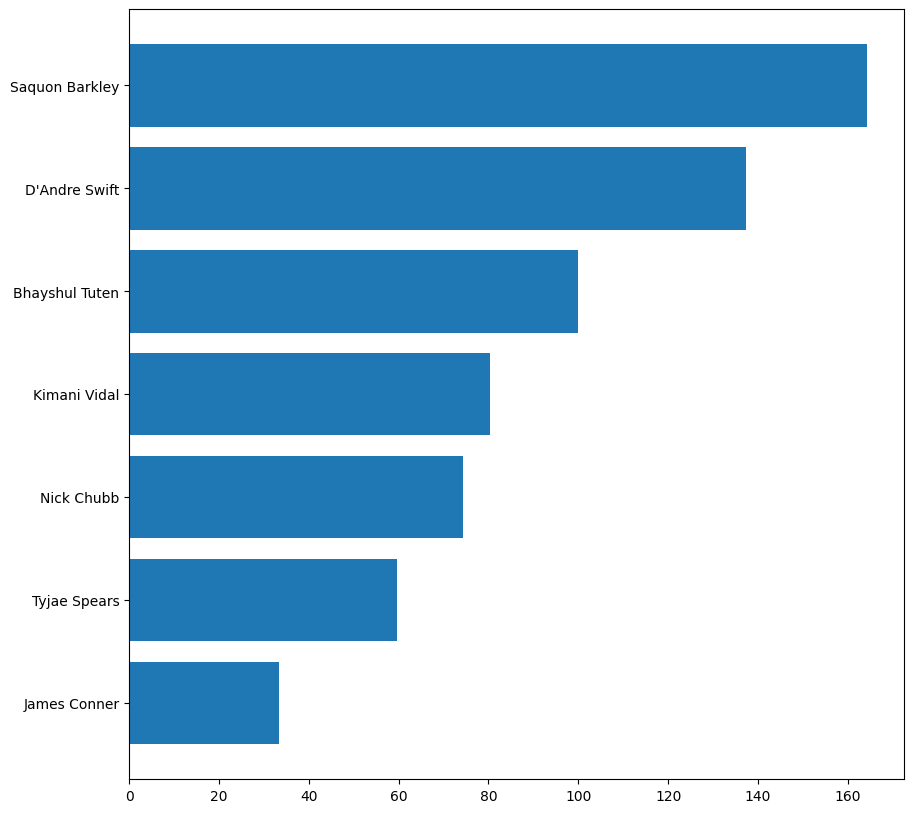

In [31]:
wrt_stats = get_position_stats(team_stats, 'RB')
wrt_stats = wrt_stats.sort_values('total_points')
plt.figure(figsize=(10, 10))
plt.barh(wrt_stats['name'], wrt_stats['total_points'])